### 1 Data Preparation

#### 1.1 Read multiple csv and concate

In [3]:
import pandas as pd
import glob
import os

In [32]:
# Get CSV files list from a folder
csv_files = glob.glob("./*.csv")

In [34]:
# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

In [35]:
# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)


,created_at,User,Tweet,User's_Followers,mentioned_user,mentioned_user_followers
0,2022-05-19 23:56:50+00:00,halo_akuadit,RT @pkugamping: 📢 Info Vaksinasi Covid 19\n\n🔰...,27,pkugamping,357
1,2022-05-19 23:49:43+00:00,Ciesar82,"RT @keretaapikita: #Railfriends, Mulai 18 Mei ...",0,keretaapikita,135854
2,2022-05-19 22:05:31+00:00,Dewiy37641942,"RT @keretaapikita: #Railfriends, Mulai 18 Mei ...",1,keretaapikita,135854
3,2022-05-19 21:05:16+00:00,qwertyxsaa,RT @tiket: 📣 Info Terbaru Perjalanan Domestik ...,820,tiket,123509
4,2022-05-19 15:19:09+00:00,smb2_airport,RT @contactap2: Melalui surat edaran Satgas Co...,4815,contactap2,37103
...,...,...,...,...,...,...
25480,2022-05-14 16:09:34+00:00,D_N4bil5,RT @bwinsandi3: @KemenBUMN @erickthohir meninj...,30642,bwinsandi3,1405
25481,2022-05-14 15:54:21+00:00,sopiarfau,@KAI121 min untuk KA jarak jauh jika sudah vak...,113,KAI121,1025442
25482,2022-05-14 15:48:17+00:00,innuyana,RT @inisialEB: Udah booster.\nTapi masih di su...,457,inisialEB,460
25483,2022-05-14 15:44:51+00:00,IntoYJW,"@jungwoniesm Engga, aku kuat aku udah vaksin b...",1178,jungwoniesm,1116


In [36]:
# save merged data to csv
df.to_csv("merged_data.csv", index=False)

#### 1.2 Inspect redundant tweet data

In [44]:
print(f"Data dimension: {df.shape[0]} rows x {df.shape[1]} cols")
print(f"Number of unique twitter: {df.Tweet.nunique()}")
print(f"Unique value percentages: {(df.Tweet.nunique()/df.shape[0])*100:.2f}")

Data dimension: 25485 rows x 6 cols
Number of unique twitter: 1682
Unique value percentages: 6.60


In [90]:
# drop duplicated tweet rows
df_unique = df.drop_duplicates(subset=["Tweet"])
df_unique = df_unique.reset_index(drop=True)
df_unique

,created_at,User,Tweet,User's_Followers,mentioned_user,mentioned_user_followers
0,2022-05-19 23:56:50+00:00,halo_akuadit,RT @pkugamping: 📢 Info Vaksinasi Covid 19\n\n🔰...,27,pkugamping,357
1,2022-05-19 23:49:43+00:00,Ciesar82,"RT @keretaapikita: #Railfriends, Mulai 18 Mei ...",0,keretaapikita,135854
2,2022-05-19 21:05:16+00:00,qwertyxsaa,RT @tiket: 📣 Info Terbaru Perjalanan Domestik ...,820,tiket,123509
3,2022-05-19 15:19:09+00:00,smb2_airport,RT @contactap2: Melalui surat edaran Satgas Co...,4815,contactap2,37103
4,2022-05-19 15:18:30+00:00,smb2_airport,RT @contactap2: bagi yg sudah mendapatkan vaks...,4815,contactap2,37103
...,...,...,...,...,...,...
1677,2022-05-13 07:06:22+00:00,dariyah24,@ElvinaNara Banyak warga luar Jakarta yang mer...,1,ElvinaNara,0
1678,2022-05-20 13:42:11+00:00,endonesa345,@Pencerah__ @EDenzka Dia akun BOT ...\n\nNgaku...,108,Pencerah__,14900
1679,2022-05-20 12:22:34+00:00,NHeryana96,Banyak yang belum vaksin booster tapi di #pedu...,4418,KemenkesRI,677624
1680,2022-05-20 03:36:47+00:00,320921K,@hudhyunjin Emang booster harus umur 18 dulu. ...,100,hudhyunjin,0


In [46]:
# save unique twitter data to csv
df_unique.to_csv("unique_tweet.csv", index=False)

### 2. EDA

#### 2.1 Statistics

In [102]:
df.describe()

,User's_Followers,mentioned_user_followers
count,2.548500e+04,2.548500e+04
mean,1.598728e+04,1.189190e+05
std,1.171182e+05,1.219058e+06
min,0.000000e+00,0.000000e+00
25%,1.060000e+02,0.000000e+00
50%,4.580000e+02,1.000000e+00
75%,1.741000e+03,2.939000e+03
max,3.426543e+06,1.821387e+07


In [110]:
# plot frequent users that tweet about "vaksin booster"

import matplotlib.pyplot as plt
import seaborn as sns

def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

C:\Users\M.FAHRURY\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


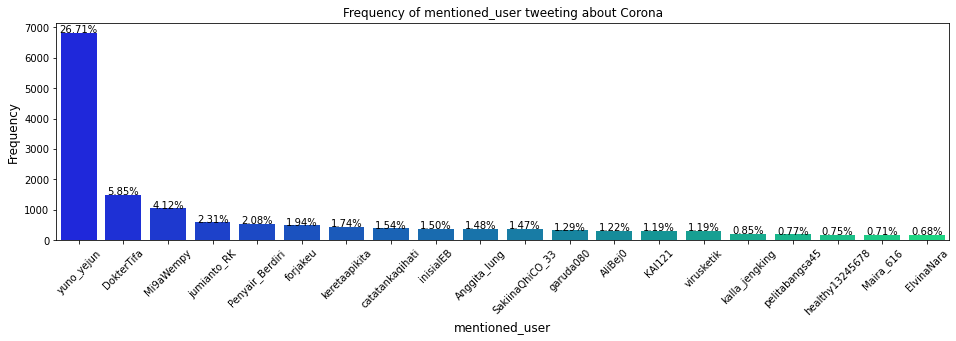

In [111]:
# plot it
plot_frequency_charts(df, 'mentioned_user', 'mentioned_user','winter')

#### 2.2 Thorough manual tweet checking

In [117]:
# inspect the tweet from 5 most frequent users
df_unique[df_unique["mentioned_user"] == "yuno_yejun"]["Tweet"].values

array(['RT @yuno_yejun: ADOPSI KUCING KITTEN (FREE)\n✨Jantan\n✨Tanggal Lahir: 10 Sept’ 2021\n✨Sudah steril pada: 16 Mar’ 2022\n✨Vaksin booster: 28 Feb’…',
       '@yuno_yejun Vaksin booster?'], dtype=object)

**seems like retweeted tweet from @yuno_yejun is out of context since she/he talking about cat vaccine**, 
so we will exclude tweet that mentioned this user

In [134]:
# drop tweet that RT yuno_yejun tweet
i = df_unique[df_unique["mentioned_user"] == "yuno_yejun"].index
df_unique2 = df_unique.drop(i)
df_unique2

,created_at,User,Tweet,User's_Followers,mentioned_user,mentioned_user_followers
0,2022-05-19 23:56:50+00:00,halo_akuadit,RT @pkugamping: 📢 Info Vaksinasi Covid 19\n\n🔰...,27,pkugamping,357
1,2022-05-19 23:49:43+00:00,Ciesar82,"RT @keretaapikita: #Railfriends, Mulai 18 Mei ...",0,keretaapikita,135854
2,2022-05-19 21:05:16+00:00,qwertyxsaa,RT @tiket: 📣 Info Terbaru Perjalanan Domestik ...,820,tiket,123509
3,2022-05-19 15:19:09+00:00,smb2_airport,RT @contactap2: Melalui surat edaran Satgas Co...,4815,contactap2,37103
4,2022-05-19 15:18:30+00:00,smb2_airport,RT @contactap2: bagi yg sudah mendapatkan vaks...,4815,contactap2,37103
...,...,...,...,...,...,...
1677,2022-05-13 07:06:22+00:00,dariyah24,@ElvinaNara Banyak warga luar Jakarta yang mer...,1,ElvinaNara,0
1678,2022-05-20 13:42:11+00:00,endonesa345,@Pencerah__ @EDenzka Dia akun BOT ...\n\nNgaku...,108,Pencerah__,14900
1679,2022-05-20 12:22:34+00:00,NHeryana96,Banyak yang belum vaksin booster tapi di #pedu...,4418,KemenkesRI,677624
1680,2022-05-20 03:36:47+00:00,320921K,@hudhyunjin Emang booster harus umur 18 dulu. ...,100,hudhyunjin,0


In [121]:
for tweet in df_unique[df_unique["mentioned_user"] == "DokterTifa"]["Tweet"]:
    print(tweet)

@DokterTifa Penjelasan Bu Sri M : Ahamdulillah, karena sudah mendapat vaksin anti Covid-19 secara lengkap 2 kali dan juga vaksin booster jenis MRNA sesuai aturan vaksinasi pemerintah, saya hanya mengalami gejala sangat ringan. Batuk sedikit dan pilek dengan sedikit sakit kepala beberapa hari
RT @DokterTifa: Katanya sudah 2 kali vaksin dan 1 kali booster
Dan kena COVID.
Dan bilang: "Untung sudah booster'

Memanglah

Semua akan du…
RT @DokterTifa: Semua ramai-ramai ngaku COVID +. 
Di saat CFR tinggal 1%. 

Bill Gates.
Kamala Harris
Jill Biden
termasuk Sri Mulyani 

Dan…
@DokterTifa Vaksin booster aman dan halal
#JagaProkesNvaksin
#IndonesiaSehatIndonesiaHebat
#BersatuLawanCovid19
#NegeriPulihDenganVaksin https://t.co/wlmU16VPco
@DokterTifa Alhamdulillah aku gak vaksin palagi booster tapi cuma pake booster tanaka di rumah buat nonton TV .. 😂
@DokterTifa Dokter apa "Tuhan"..
Yang menentukan sehat sakit hanya Tuhan.

Manusia hanya berusaha..ikhtiar..dan doa..

Vaksin..booster..bentuk ikhtia

In [122]:
for tweet in df_unique[df_unique["mentioned_user"] == "Mi9aWempy"]["Tweet"]:
    print(tweet)

RT @Mi9aWempy: Dari peristiwa UAS kemarin, 
Kita jadi tau.. 
Kalo UAS sudah booster vaksin
.. 😌
@Mi9aWempy Tidak ada tambahan lagi kah selain booster vaksin ?
🤣🤣🤣🤣
@Mi9aWempy Standar janda so mad
Bilang vaksin haram
Sendirinya vaksin ampe booster pula
Korbannya kadrun2 guoblogg ga mau vaksin


In [124]:
for tweet in df_unique[df_unique["mentioned_user"] == "jumianto_RK"]["Tweet"]:
    print(tweet)

RT @jumianto_RK: Apa syaratnya kunjungan ke Singapura, syarat harus Vaksin ke-3 Booster

Artinya Somad udah Vaksinasi 3 kali, ternyata para…
@jumianto_RK Double prank 😂😂😂 , pengikut nya di suruh belanja ke warung, eh dia mau belanja ke Singapore 😂😂 , pengikutnya ditakut2i soal vaksin, eh dia ketahuan udah vaksin ke 3 booster  😂😂😂
@jumianto_RK Hahaha...iy juga yaaaa tnp disadari dan terbukti pngikutnya ditipu semua anti vaksin sementara dia sdh divaksin lengkap dg booster yaaaa anjaaaaaayyy


In [126]:
for tweet in df_unique[df_unique["mentioned_user"] == "Penyair_Berdiri"]["Tweet"]:
    print(tweet)

RT @Penyair_Berdiri: Vaksin Covid 19 dari tahap 1 , 2 , 3 atau Booster sudah dipersiapkan dalam kondisi terbaik dan aman, teruji klinis BPO…
@Penyair_Berdiri Vaksin booster yuk
#PrioritaskanProtokolKesehatan
Selamat Hari Raya Waisak
RT @Penyair_Berdiri: Seluruh vaksin covid yang disediakan untuk masyarakat telah teruji klinis, minim effek samping, berkhasiat &amp; halal. Te…
RT @Penyair_Berdiri: Vaksin Booster Aman &amp; Nyaman
TNI AL menggelar giat vaksinasi diwilayah kerja Nguling, Pasuruan.
Untuk perlindungan kes…
RT @Penyair_Berdiri: Program Vaksinasi Gratis dari Pemerintah dari dosis pertama hingga dosis ketiga atau booster sudah hampir merata &amp; 
TE…
@Penyair_Berdiri #VaksinProkesKunciSehat
#ThomasCup2022

Lengkapi dosis vaksin hingga booster &amp; tetap disiplin PROKES
kunci keluar dari pandemi covid
@Penyair_Berdiri @PopLoyalty Dosis Vaksin
Hingga Booster
Penting untuk mengakhiri Pandemi
#SelaluProkesDimanapunBerada
#ThomasCup2022
RT @Penyair_Berdiri: Di posko2 kesehatan yan

#### 2.3 WordCloud

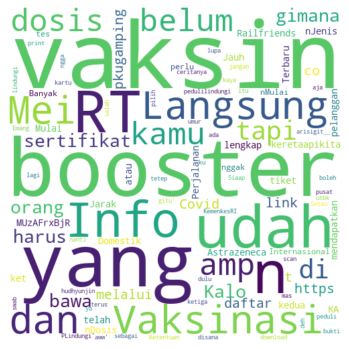

In [150]:
# draw the wordcloud to see frequent words
from wordcloud import STOPWORDS, WordCloud
plt.figure(figsize = (6, 10))
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(str(df_unique2.Tweet.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### 3. Text-Preprocessing

#### 3.1 Tweet cleaning

In [191]:
import re

# prepare new dataset
df_new = pd.DataFrame(df_unique2)
df_new["text"] = df_new["Tweet"]

# remove hastags
rm_hash = lambda x: re.sub("\B@\w+", "", x)
rm_hash2 = lambda x: re.sub("\B#\w+", "", x)
# rm links
rm_link = lambda x: re.sub(r"http\S+", " ", x)
rm_link2 = lambda x: re.sub(r"www.\S+", " ", x)
# rm puncts
rm_punct = lambda x: re.sub("[()!?]", " ", x)
rm_punct2 = lambda x: re.sub("\[.*?\]", " ", x)
# filter non-alpha
fil_nonalp = lambda x: re.sub("[^a-zA-Z0-9 -]", " ", x)
# filter RT word
# fill_RT = lambda x: re.sub("[RT]+", "", x)

In [192]:
# run all regex filters
df_new["text"] = df_new.text.map(rm_hash).map(rm_hash2).map(rm_link).map(rm_link2).map(rm_punct).map(rm_punct2).map(fil_nonalp)
df_new

,created_at,User,Tweet,User's_Followers,mentioned_user,mentioned_user_followers,text
0,2022-05-19 23:56:50+00:00,halo_akuadit,RT @pkugamping: 📢 Info Vaksinasi Covid 19\n\n🔰...,27,pkugamping,357,RT Info Vaksinasi Covid 19 Langsung daf...
1,2022-05-19 23:49:43+00:00,Ciesar82,"RT @keretaapikita: #Railfriends, Mulai 18 Mei ...",0,keretaapikita,135854,RT Mulai 18 Mei 2022 pelanggan KA Jarak J...
2,2022-05-19 21:05:16+00:00,qwertyxsaa,RT @tiket: 📣 Info Terbaru Perjalanan Domestik ...,820,tiket,123509,RT Info Terbaru Perjalanan Domestik amp ...
3,2022-05-19 15:19:09+00:00,smb2_airport,RT @contactap2: Melalui surat edaran Satgas Co...,4815,contactap2,37103,RT Melalui surat edaran Satgas Covid-19 nomo...
4,2022-05-19 15:18:30+00:00,smb2_airport,RT @contactap2: bagi yg sudah mendapatkan vaks...,4815,contactap2,37103,RT bagi yg sudah mendapatkan vaksin COVID-19...
...,...,...,...,...,...,...,...
1677,2022-05-13 07:06:22+00:00,dariyah24,@ElvinaNara Banyak warga luar Jakarta yang mer...,1,ElvinaNara,0,Banyak warga luar Jakarta yang merembes masuk...
1678,2022-05-20 13:42:11+00:00,endonesa345,@Pencerah__ @EDenzka Dia akun BOT ...\n\nNgaku...,108,Pencerah__,14900,Dia akun BOT Ngakunya anti Vaksin pada...
1679,2022-05-20 12:22:34+00:00,NHeryana96,Banyak yang belum vaksin booster tapi di #pedu...,4418,KemenkesRI,677624,Banyak yang belum vaksin booster tapi di udah...
1680,2022-05-20 03:36:47+00:00,320921K,@hudhyunjin Emang booster harus umur 18 dulu. ...,100,hudhyunjin,0,Emang booster harus umur 18 dulu Ketentuan p...


**before** and **after**

In [193]:
df_new.loc[:,["Tweet", "text"]]

,Tweet,text
0,RT @pkugamping: 📢 Info Vaksinasi Covid 19\n\n🔰...,RT Info Vaksinasi Covid 19 Langsung daf...
1,"RT @keretaapikita: #Railfriends, Mulai 18 Mei ...",RT Mulai 18 Mei 2022 pelanggan KA Jarak J...
2,RT @tiket: 📣 Info Terbaru Perjalanan Domestik ...,RT Info Terbaru Perjalanan Domestik amp ...
3,RT @contactap2: Melalui surat edaran Satgas Co...,RT Melalui surat edaran Satgas Covid-19 nomo...
4,RT @contactap2: bagi yg sudah mendapatkan vaks...,RT bagi yg sudah mendapatkan vaksin COVID-19...
...,...,...
1677,@ElvinaNara Banyak warga luar Jakarta yang mer...,Banyak warga luar Jakarta yang merembes masuk...
1678,@Pencerah__ @EDenzka Dia akun BOT ...\n\nNgaku...,Dia akun BOT Ngakunya anti Vaksin pada...
1679,Banyak yang belum vaksin booster tapi di #pedu...,Banyak yang belum vaksin booster tapi di udah...
1680,@hudhyunjin Emang booster harus umur 18 dulu. ...,Emang booster harus umur 18 dulu Ketentuan p...


In [194]:
# write to csv
df_new.to_csv("cleaned_tweet.csv", index=False)

### 4. IndoBERT Labelling

#### 4.1 Preparations

In [181]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

C:\Users\M.FAHRURY\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [182]:
# Download Pretrained Model
pretrained= "mdhugol/indonesia-bert-sentiment-classification"

In [183]:
# Set Model and Tokenizer
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

In [184]:
# Set Pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [185]:
# Set Label
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

In [204]:
# test it
# input text
text = df_new["text"][1678]

# Sentiment Analysis
result = sentiment_analysis(text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {text} | Label : {status} ({score * 100:.3f}%)')

Text:   Dia akun BOT      Ngakunya anti Vaksin  padahal UAS udah sampe Booster biar bisa ke LN        | Label : negative (95.984%)


#### 4.2 Sentiment Labelling

In [205]:
# prepare list to contain result
tweet = []
statuses = []
scores = []

In [206]:
# loop through each tweet text and analyse the sentiment
for text in df_new["text"]:
    result = sentiment_analysis(text)
    status = label_index[result[0]['label']] # yield the sentiment label
    score = result[0]['score'] # yield the score of the selected label
    tweet.append(text)
    statuses.append(status)
    scores.append(score)

In [209]:
# write the result to dataframe
sa_result = pd.DataFrame({
    'author': df_new.reset_index().User, 
    'retweeted_user': df_new.reset_index().mentioned_user,
    'tweet': tweet, 
    'status': statuses, 
    'score': scores})

sa_result

,author,retweeted_user,tweet,status,score
0,halo_akuadit,pkugamping,RT Info Vaksinasi Covid 19 Langsung daf...,neutral,0.997970
1,Ciesar82,keretaapikita,RT Mulai 18 Mei 2022 pelanggan KA Jarak J...,neutral,0.997116
2,qwertyxsaa,tiket,RT Info Terbaru Perjalanan Domestik amp ...,neutral,0.994555
3,smb2_airport,contactap2,RT Melalui surat edaran Satgas Covid-19 nomo...,neutral,0.994120
4,smb2_airport,contactap2,RT bagi yg sudah mendapatkan vaksin COVID-19...,neutral,0.997779
...,...,...,...,...,...
1675,dariyah24,ElvinaNara,Banyak warga luar Jakarta yang merembes masuk...,neutral,0.970152
1676,endonesa345,Pencerah__,Dia akun BOT Ngakunya anti Vaksin pada...,negative,0.959842
1677,NHeryana96,KemenkesRI,Banyak yang belum vaksin booster tapi di udah...,negative,0.914715
1678,320921K,hudhyunjin,Emang booster harus umur 18 dulu Ketentuan p...,neutral,0.574308


#### 4.3 SA Result Analysis

##### 4.3.1 Portion of sentiment

In [214]:
count = [sa_result[sa_result["status"] == "negative"]["status"].count(), sa_result[sa_result["status"] == "neutral"]["status"].count(), sa_result[sa_result["status"] == "positive"]["status"].count()]
label = ["Negative", "Neutral", "Positive"]

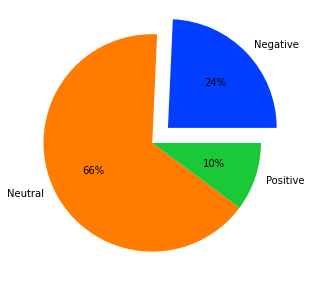

In [231]:
#define Seaborn color palette to use
plt.figure(figsize=(7,5))
colors = sns.color_palette('bright')[0:3]
xpld = [0.2, 0, 0]

#create pie chart
plt.pie(count, labels = label, colors = colors, autopct='%.0f%%', explode = xpld)
plt.show()

##### 4.3.2 SA result score description statistics

In [235]:
# mean score of each sentiment status
sa_result.groupby(["status"]).mean()

,score
status,
negative,0.865265
neutral,0.908460
positive,0.806189


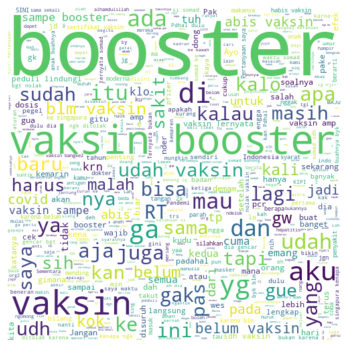

In [246]:
# wordcloud in NEGATIVE SENTIMENT
text = sa_result[sa_result["status"] == "negative"]["tweet"].values

plt.figure(figsize = (6, 10))
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(str(text))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

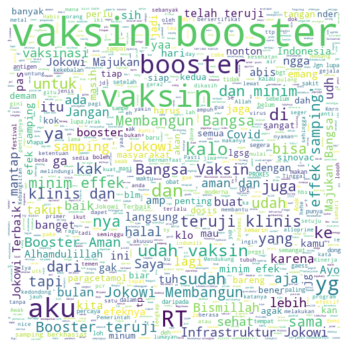

In [247]:
# wordcloud in POSITIVE SENTIMENT
text = sa_result[sa_result["status"] == "positive"]["tweet"].values

plt.figure(figsize = (6, 10))
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(str(text))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

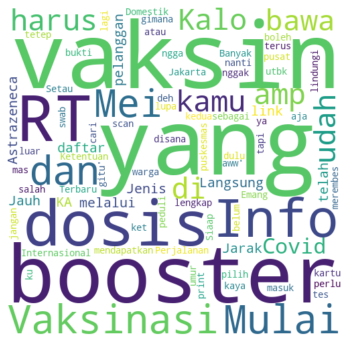

In [248]:
# wordcloud in NEUTRAL SENTIMENT
text = sa_result[sa_result["status"] == "neutral"]["tweet"].values

plt.figure(figsize = (6, 10))
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(str(text))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### 5. Network preparations

In [249]:
df_new.columns

Index(['created_at', 'User', 'Tweet', 'User's_Followers', 'mentioned_user',
       'mentioned_user_followers', 'text'],
      dtype='object')

In [250]:
# node table
node_table = pd.DataFrame({"ID": pd.concat([df_new["User"], df_new["mentioned_user"]]), "Followers": pd.concat([df_new["User's_Followers"], df_new["mentioned_user_followers"]])})
node_table = node_table.drop_duplicates(subset=["ID"])
node_table = node_table.reset_index(drop=True)
node_table

,ID,Followers
0,halo_akuadit,27
1,Ciesar82,0
2,qwertyxsaa,820
3,smb2_airport,4815
4,mas__bram,715
...,...,...
2139,Dinamarch1408,11
2140,inikenjie,0
2141,Pencerah__,14900
2142,hudhyunjin,0


#### 5.1 Value error handling

According to the acquisition code inspection, there's a silent error where the code didn't expect the tweet to have more than one mentioned user. This cause was that fetched information about mentioned user followers to be erratic. So we handle this by re-fetching the followers number from recorded mentioned users only.

In [251]:
# Twitter API Connection

import tweepy
import configparser

# read configs
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [261]:
null_followers = node_table[node_table["Followers"] == 0]["ID"]

In [262]:
# Fetch the followers number
data = []

for null_user in null_followers:
    try:
        user = api.get_user(screen_name=null_user)
        foll = user.followers_count
    except:
        foll = 0
        
    data.append([null_user, foll])

data

[['Ciesar82', 0],
 ['quovino1', 0],
 ['JusticeMan22_', 0],
 ['almacans_', 0],
 ['marinepretty3', 0],
 ['ramdani0348', 0],
 ['MhmdIskandar46', 0],
 ['icejuiceavocado', 0],
 ['musianda14', 0],
 ['YulailaS', 0],
 ['messiun26', 0],
 ['tdaepv', 0],
 ['AnaHastuti7', 0],
 ['MabaStann', 0],
 ['Erwin25264812', 0],
 ['ArdiRamdona', 0],
 ['hunhun70003540', 0],
 ['Nugros19538089', 0],
 ['LucilleSanocki', 0],
 ['LucasGayung', 0],
 ['mengetij', 0],
 ['muhammadSonny15', 0],
 ['SurveyorIdBpn', 0],
 ['abimandaru', 0],
 ['Flowry61738346', 0],
 ['anishrmti', 0],
 ['FrenPatu', 0],
 ['ambon5758', 0],
 ['dajjal369', 8],
 ['adityxmdn87', 0],
 ['markjugebeg', 0],
 ['grgdc1', 0],
 ['bekti_mulya', 0],
 ['AndriRyogo', 0],
 ['IhsanNu01428360', 0],
 ['yurikanamnam', 0],
 ['mayajuw33779016', 0],
 ['BadjaHitamz', 0],
 ['fadhlijabbar_', 0],
 ['t1n1w1n1b1t1', 0],
 ['cincayo_', 0],
 ['JunaJuni123', 0],
 ['hallopembenci', 1],
 ['kkimsungchan', 0],
 ['Adhiieeyy1', 0],
 ['figorfly05', 0],
 ['Ridwan118911', 0],
 ['itsluVla

In [264]:
# to dataframe for simplicity
null_user = pd.DataFrame(data=data, columns=["user", "folls"])
null_user

,user,folls
0,Ciesar82,0
1,quovino1,0
2,JusticeMan22_,0
3,almacans_,0
4,marinepretty3,0
...,...,...
248,ganjarpranowo,2556030
249,RajoViral,794
250,inikenjie,521
251,hudhyunjin,0


In [268]:
# replace the initial value with fetched data
node_table.loc[node_table.ID.isin(null_user.user), ["Followers"]] = null_user["folls"].values
node_table

,ID,Followers
0,halo_akuadit,27
1,Ciesar82,0
2,qwertyxsaa,820
3,smb2_airport,4815
4,mas__bram,715
...,...,...
2139,Dinamarch1408,11
2140,inikenjie,521
2141,Pencerah__,14900
2142,hudhyunjin,0


In [269]:
node_table.to_csv("node_table.csv", index=False)

#### 5.2 Edge Table Preparation

In [272]:
edge_table = pd.DataFrame({
    "Source": sa_result["author"], 
    "Target": sa_result["retweeted_user"], 
    "Status": sa_result["status"], 
    "Score": sa_result["score"]})
edge_table

,Source,Target,Status,Score
0,halo_akuadit,pkugamping,neutral,0.997970
1,Ciesar82,keretaapikita,neutral,0.997116
2,qwertyxsaa,tiket,neutral,0.994555
3,smb2_airport,contactap2,neutral,0.994120
4,smb2_airport,contactap2,neutral,0.997779
...,...,...,...,...
1675,dariyah24,ElvinaNara,neutral,0.970152
1676,endonesa345,Pencerah__,negative,0.959842
1677,NHeryana96,KemenkesRI,negative,0.914715
1678,320921K,hudhyunjin,neutral,0.574308


In [273]:
edge_table.to_csv("edge_table.csv", index=False)